In [1]:
# Setting the working directory
import os
os.chdir('/Users/ssg/Desktop/Python/Data')

In [2]:
import sys
sys.path = ['/Users/ssg/Desktop/Python/packge'] + sys.path

In [3]:
# Importing relevant libraries
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Checking the version of the sklearn library
import sklearn
print("sklearn_version :" , sklearn.__version__)
import pandas
print("pandas_version :" , pandas.__version__)
import numpy
print("numpy_version :" , numpy.__version__)

sklearn_version : 0.20.2
pandas_version : 0.23.4
numpy_version : 1.15.4


In [5]:
# Reading the dataset
df_hr = pd.read_csv('IBM_HR_ATT_data.csv')

# Explore the Data

In [6]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# Get information about the features
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [8]:
# Get summary stats for the numeric variable
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Get summary stats for the categorical features
df_hr.describe(include = ['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [10]:
# Create the feature/flag for Dep variable - Attrition status
df_hr.Attrition = df_hr.Attrition.apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
# View the data - As you can see that the Attrition is now a flag variable indicating 'Yes' as 1 and 'No' as 0
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
# Explore different features for any kind of inconsistent values
print('Age:',sorted(df_hr.Age.unique()))
print('YearsWithCurrManager:',df_hr.YearsWithCurrManager.unique())
print('MonthlyIncome:',df_hr.MonthlyIncome.unique())
print('JobSatisfaction:',df_hr.JobSatisfaction.unique())
print('TotalWorkingYears:',df_hr.TotalWorkingYears.unique())
print('Education:',df_hr.Education.unique())
print('YearsWithCurrManager:',df_hr.YearsWithCurrManager.unique())
print('YearsSinceLastPromotion:',df_hr.YearsSinceLastPromotion.unique())
print('Over18:',df_hr.Over18.unique())
print('StandardHours:',df_hr.StandardHours.unique())
print('EmployeeCount:',df_hr.StandardHours.unique())
print('EmployeeNumber:',df_hr.StandardHours.unique())

Age: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
YearsWithCurrManager: [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]
MonthlyIncome: [5993 5130 2090 ... 9991 5390 4404]
JobSatisfaction: [4 2 3 1]
TotalWorkingYears: [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]
Education: [2 1 4 3 5]
YearsWithCurrManager: [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]
YearsSinceLastPromotion: [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
Over18: ['Y']
StandardHours: [80]
EmployeeCount: [80]
EmployeeNumber: [80]


Quite interesting things have been revealed by the above exercise, the summary shows that the last 4 vars, are all assuming same values and for the last 3 variables,their std was also=0.
This indicates that these 4 variables are of no use in this exercise and therefore we should eventually drop them

These 4 vars are dropped from the final dataset
Over18: ['Y']
StandardHours: [80]
EmployeeCount: [80]
EmployeeNumber: [80]

In [13]:
# Convert the categorical features
# Creating dummies for all these variables
d_bustrvl = pd.get_dummies(df_hr['BusinessTravel'], prefix='bustrvl')
d_dep = pd.get_dummies(df_hr['Department'], prefix='dep')
d_eduf = pd.get_dummies(df_hr['EducationField'], prefix='eduf')
d_gender = pd.get_dummies(df_hr['Gender'], prefix='gend')
d_jobrole = pd.get_dummies(df_hr['JobRole'], prefix='jobrole')
d_maritstat = pd.get_dummies(df_hr['MaritalStatus'], prefix='maritalstat') 
d_overtime = pd.get_dummies(df_hr['OverTime'], prefix='overtime')

There are other ways like OHE - One hot encoding to transform features as well.

In [14]:
# Create a list of final features (predictors)
feature_x = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction',
             'HourlyRate', 'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 
             'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
             'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
             'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
             'YearsWithCurrManager','d_bustrvl','d_dep','d_eduf','d_gender',
             'd_jobrole','d_maritstat','d_overtime']

In [15]:
# Create the final dataset with all the relevant features - both dependant and predictors
feature_x_cont = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction',
                  'HourlyRate', 'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 
                  'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                  'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 
                  'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                  'YearsSinceLastPromotion','YearsWithCurrManager']
df_hr_cont = df_hr[feature_x_cont]

# Creating the Final data with all the relevant fields and Dep Variable
df_hr_new = pd.concat([d_bustrvl,d_dep,d_eduf,d_gender,
                       d_jobrole,d_maritstat,d_overtime,
                       df_hr_cont,df_hr['Attrition']],axis=1)

In [16]:
# Lets look at the final data and print its shape
print(df_hr_new.shape)

(1470, 52)


In [17]:
df_hr_new.head()

,bustrvl_Non-Travel,bustrvl_Travel_Frequently,bustrvl_Travel_Rarely,dep_Human Resources,dep_Research & Development,dep_Sales,eduf_Human Resources,eduf_Life Sciences,eduf_Marketing,eduf_Medical,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,0,1,0,0,1,0,1,0,0,...,1,0,8,0,1,6,4,0,5,1
1,0,1,0,0,1,0,0,1,0,0,...,4,1,10,3,3,10,7,1,7,0
2,0,0,1,0,1,0,0,0,0,0,...,2,0,7,3,3,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,...,3,0,8,3,3,8,7,3,0,0
4,0,0,1,0,1,0,0,0,0,1,...,4,1,6,3,3,2,2,2,2,0


As you can now see that all the relevant fields are now converted into numeric fields

In [18]:
# Check the datatypes of the features and that will give you a hint if any further changes need to be made
df_hr_new.dtypes

bustrvl_Non-Travel                   uint8
bustrvl_Travel_Frequently            uint8
bustrvl_Travel_Rarely                uint8
dep_Human Resources                  uint8
dep_Research & Development           uint8
dep_Sales                            uint8
eduf_Human Resources                 uint8
eduf_Life Sciences                   uint8
eduf_Marketing                       uint8
eduf_Medical                         uint8
eduf_Other                           uint8
eduf_Technical Degree                uint8
gend_Female                          uint8
gend_Male                            uint8
jobrole_Healthcare Representative    uint8
jobrole_Human Resources              uint8
jobrole_Laboratory Technician        uint8
jobrole_Manager                      uint8
jobrole_Manufacturing Director       uint8
jobrole_Research Director            uint8
jobrole_Research Scientist           uint8
jobrole_Sales Executive              uint8
jobrole_Sales Representative         uint8
maritalstat

# Exploratory data analysis

(0, 120)

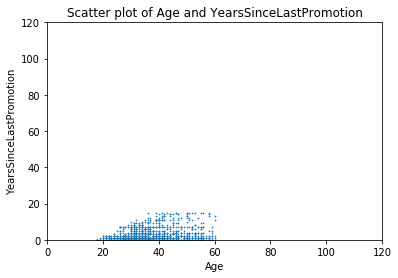

In [19]:
# Scatter Plot Between Age and HourOfTheDay
plt.scatter(df_hr_new['Age'], df_hr_new['YearsSinceLastPromotion'], s=0.5)
plt.title('Scatter plot of Age and YearsSinceLastPromotion')
plt.xlabel('Age')
plt.ylabel('YearsSinceLastPromotion')
plt.xlim(0, 120)
plt.ylim(0, 120)

In [42]:
# Calculating Pearson Correlation Between Age and MonthlyIncome
pd.set_option('display.width', 200)
pd.set_option('precision', 2)
correlations = df_hr_new[['Age', 'MonthlyIncome']].corr(method='pearson')
print(correlations)

               Age  MonthlyIncome
Age            1.0            0.5
MonthlyIncome  0.5            1.0


Text(0, 0.5, 'Frequency')

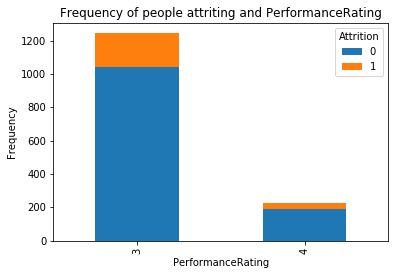

In [20]:
# Effect on Attrition on the Basis of PerformanceRating
data_dow_status = df_hr_new.groupby(['PerformanceRating', 'Attrition'])['PerformanceRating'].count().unstack('Attrition').fillna(0)
data_dow_status[[0, 1]].plot(kind='bar', stacked=True)
plt.title('Frequency of people attriting and PerformanceRating')
plt.xlabel('PerformanceRating')
plt.ylabel('Frequency')

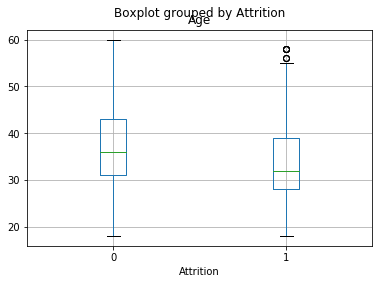

In [21]:
# If age plays any role for attrition
# Plotting Box Plot of Patients’ Age by Status
df_hr_new.boxplot(column=['Age'], return_type='axes', by='Attrition')
plt.show()

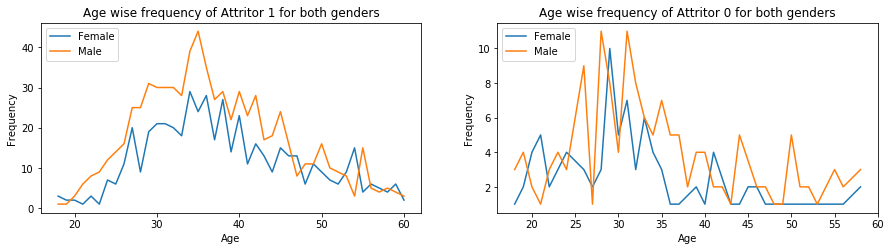

In [22]:
# Plotting Line Plot of Age by Gender for attrition status
df_hr.Gender = df_hr.Gender.apply(lambda x: 1 if x == 'Male' else 0)
plt.figure(figsize=(15,3.5))
for i, Attrition in enumerate([1, 0]):
    data_show = df_hr[df_hr['Attrition']==i]
    plt.subplot(1, 2, i+1)
    for gender in [0, 1]:
        data_gender = data_show[data_show['Gender']==gender]
        freq_age = data_gender['Age'].value_counts().sort_index()
        freq_age.plot()
    plt.title('Age wise frequency of Attritor %s for both genders'%Attrition)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend(['Female', 'Male'], loc='upper left')

In [23]:
# Get an idea about the event rate/attrition rate
df_hr_new['Attrition'].value_counts()/len(df_hr_new)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

The event rate is 16% in this attrition data

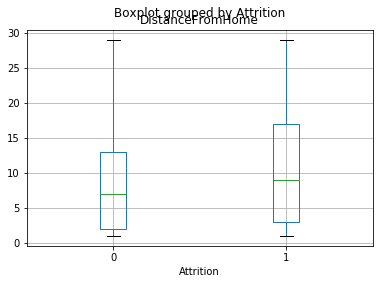

In [24]:
# Plotting Box Plot of DistanceFromHome by Attrition
df_hr_new.boxplot(column=['DistanceFromHome'], return_type='axes', by='Attrition')
plt.show()

In [25]:
# We can do some further EDA for a pool of features as well
subset_attributes = ['Age', 'DistanceFromHome', 'Education', 'MonthlyIncome',
                    'TotalWorkingYears','YearsWithCurrManager','YearsWithCurrManager',
                    'PerformanceRating','JobSatisfaction']
att_yes = round(df_hr_new[df_hr_new['Attrition'] == 1][subset_attributes].describe(),2)
att_no = round(df_hr_new[df_hr_new['Attrition'] == 0][subset_attributes].describe(),2)
pd.concat([att_yes, att_no], axis=1, keys=['Attritor', 'Non Attritor'])

Attritor                                                             \
           Age DistanceFromHome Education MonthlyIncome TotalWorkingYears   
count   237.00           237.00    237.00        237.00            237.00   
mean     33.61            10.63      2.84       4787.09              8.24   
std       9.69             8.45      1.01       3640.21              7.17   
min      18.00             1.00      1.00       1009.00              0.00   
25%      28.00             3.00      2.00       2373.00              3.00   
50%      32.00             9.00      3.00       3202.00              7.00   
75%      39.00            17.00      4.00       5916.00             10.00   
max      58.00            29.00      5.00      19859.00             40.00   

                                                                   \
      YearsWithCurrManager YearsWithCurrManager PerformanceRating   
count               237.00               237.00            237.00   
mean                  2.85                 2.85              3.16   
std                   3.14                 3.14              0.36   
min                   0.00                 0.00              3.00   
25%                   0.00                 0.00              3.00   
50%                   2.00                 2.00              3.00   
75%                   5.00                 5.00              3.00   
max                  14.00                14.00              4.00   

                      Non Attritor                                           \
      JobSatisfaction          Age DistanceFromHome Education MonthlyIncome   
count          237.00      1233.00          1233.00   1233.00       1233.00   
mean             2.47        37.56             8.92      2.93       6832.74   
std              1.12         8.89             8.01      1.03       4818.21   
min              1.00        18.00             1.00      1.00       1051.00   
25%              1.00        31.00             2.00      2.00       3211.00   
50%              3.00        36.00             7.00      3.00       5204.00   
75%              3.00        43.00            13.00      4.00       8834.00   
max              4.00        60.00            29.00      5.00      19999.00   

                                                                   \
      TotalWorkingYears YearsWithCurrManager YearsWithCurrManager   
count           1233.00              1233.00              1233.00   
mean              11.86                 4.37                 4.37   
std                7.76                 3.59                 3.59   
min                0.00                 0.00                 0.00   
25%                6.00                 2.00                 2.00   
50%               10.00                 3.00                 3.00   
75%               16.00                 7.00                 7.00   
max               38.00                17.00                17.00   

                                         
      PerformanceRating JobSatisfaction  
count           1233.00         1233.00  
mean               3.15            2.78  
std                0.36            1.09  
min                3.00            1.00  
25%                3.00            2.00  
50%                3.00            3.00  
75%                3.00            4.00  
max                4.00            4.00

In [26]:
# Inferential Stats
from scipy import stats
 
F, p = stats.f_oneway(df_hr_new[df_hr_new['Attrition'] == 1]['DistanceFromHome'], 
                      df_hr_new[df_hr_new['Attrition'] == 0]['DistanceFromHome'])
print('ANOVA test for mean DistanceFromHome levels across attrition status')
print('F Statistic:', F, ' p-value:', p)

F, p = stats.f_oneway(df_hr_new[df_hr_new['Attrition'] == 1]['PerformanceRating'], 
                      df_hr_new[df_hr_new['Attrition'] == 0]['PerformanceRating'])
print('ANOVA test for mean PerformanceRating levels across attrition status')
print('F Statistic:', F, ' p-value:', p)

ANOVA test for mean DistanceFromHome levels across attrition status
F Statistic: 8.968276593814723  p-value: 0.0027930600802132115
ANOVA test for mean PerformanceRating levels across attrition status
F Statistic: 0.012250395534223307  p-value: 0.9118840421067758


Text(0, 0.5, 'MonthlyIncome')

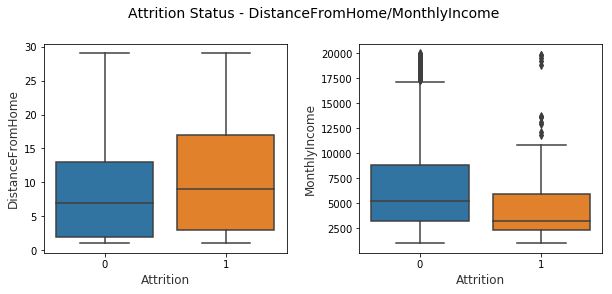

In [27]:
import seaborn as sns
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.suptitle('Attrition Status - DistanceFromHome/MonthlyIncome', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.boxplot(x="Attrition", y="DistanceFromHome",
            data=df_hr_new, ax=ax1)
ax1.set_xlabel("Attrition",size = 12,alpha=0.8)
ax1.set_ylabel("DistanceFromHome",size = 12,alpha=0.8)

sns.boxplot(x="Attrition", y="MonthlyIncome", data=df_hr_new, ax=ax2)
ax2.set_xlabel("Attrition",size = 12,alpha=0.8)
ax2.set_ylabel("MonthlyIncome",size = 12,alpha=0.8)

/Users/ssg/Desktop/Python/packge/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '
/Users/ssg/Desktop/Python/packge/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


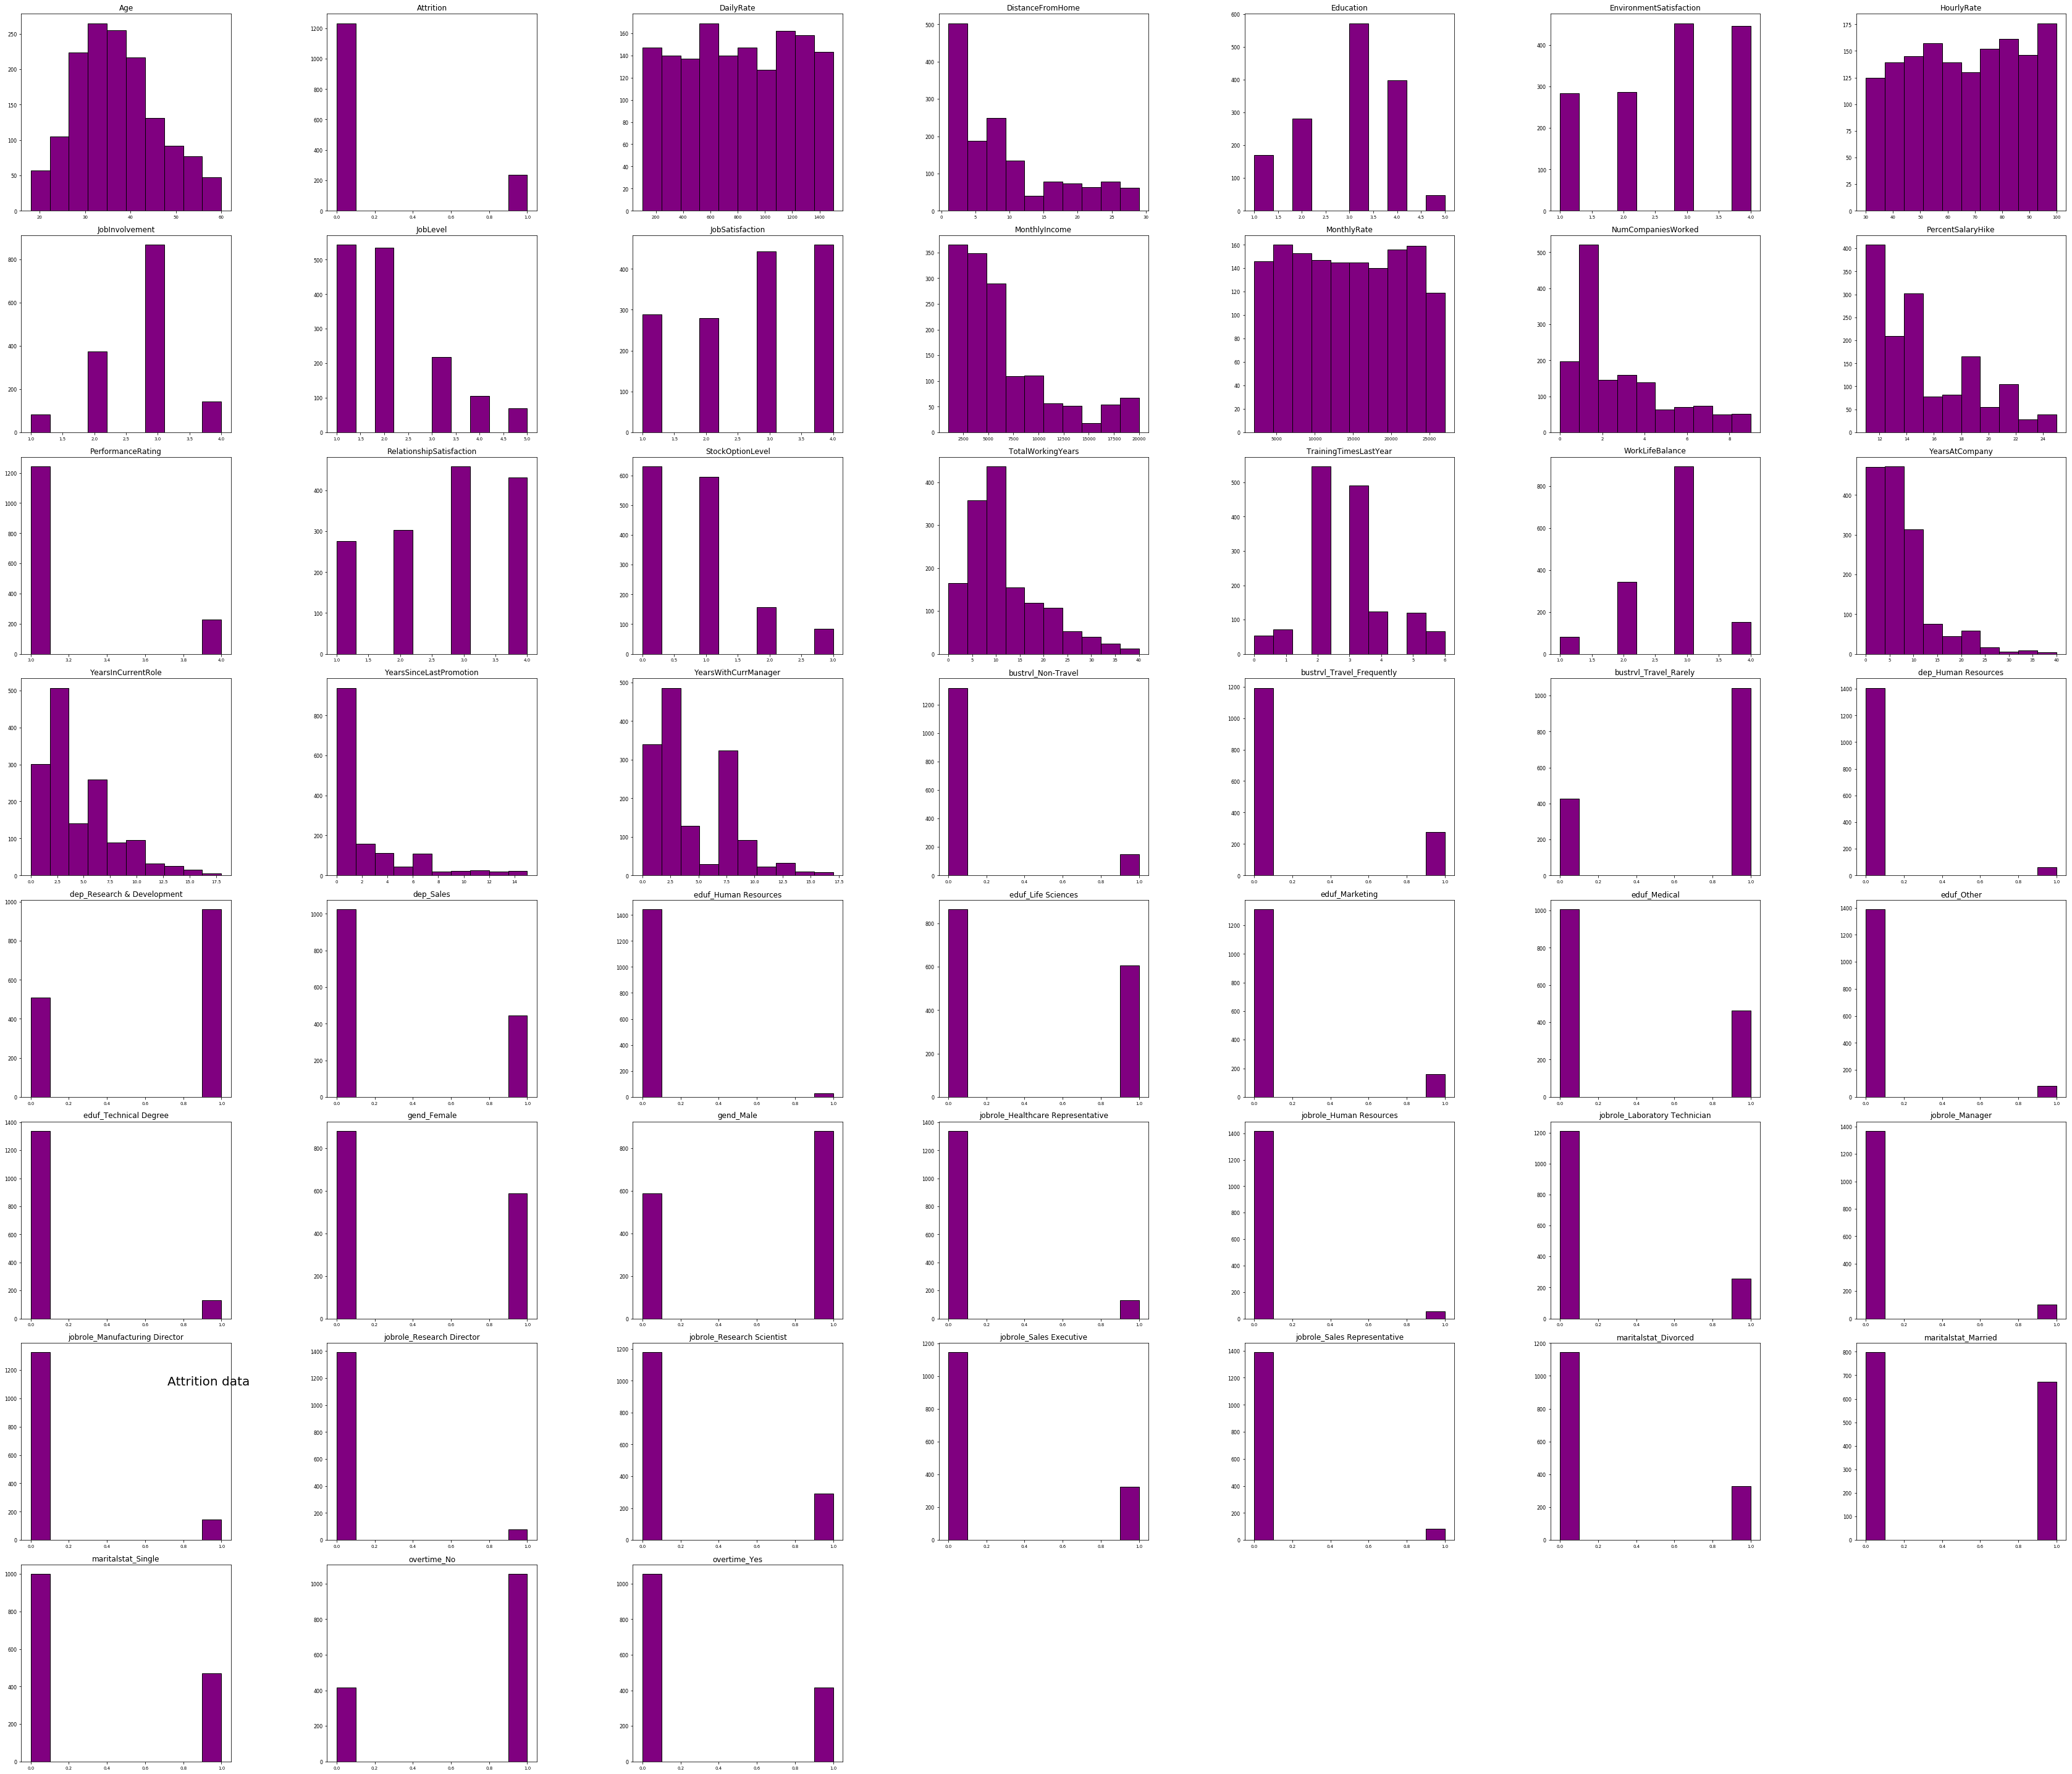

In [28]:
# Univariate analysis
df_hr_new.hist(bins=10, color='purple', edgecolor='black', linewidth=1.0,
              xlabelsize=7, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 8, 10))   
rt = plt.suptitle('Attrition data', x=0.9, y=2.25, fontsize=20)

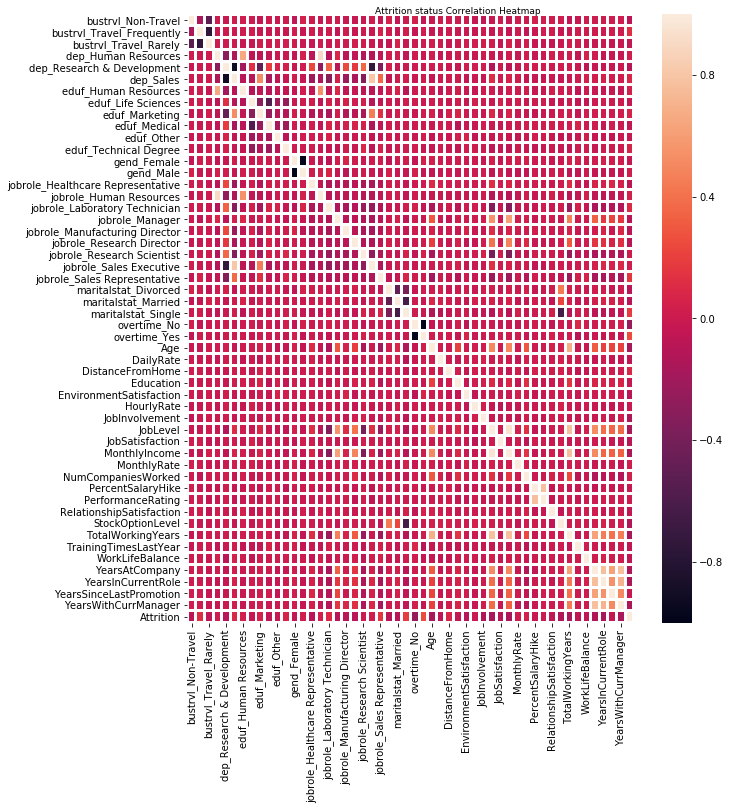

In [29]:
# Multi-Variate Analysis
f, ax = plt.subplots(figsize=(10, 10))
corr = df_hr_new.corr(method='pearson')
hmap = sns.heatmap(round(corr,2), annot=False, ax=ax,fmt='0.0001f',linewidths=2)
f.subplots_adjust(top=0.97)
t_o= f.suptitle('Attrition status Correlation Heatmap', fontsize=9)

In [30]:
# Finding the Correlation values for all the features
(round(df_hr_new.corr(),2))

,bustrvl_Non-Travel,bustrvl_Travel_Frequently,bustrvl_Travel_Rarely,dep_Human Resources,dep_Research & Development,dep_Sales,eduf_Human Resources,eduf_Life Sciences,eduf_Marketing,eduf_Medical,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
bustrvl_Non-Travel,1.00,-0.16,-0.53,-0.00,-0.01,0.01,0.02,0.01,-0.03,0.01,...,0.02,0.03,-0.03,-0.02,0.01,0.01,0.01,0.02,0.02,-0.07
bustrvl_Travel_Frequently,-0.16,1.00,-0.75,-0.01,0.00,-0.00,0.01,0.03,-0.02,-0.01,...,0.03,-0.02,-0.01,0.01,0.01,0.01,0.00,0.02,0.01,0.12
bustrvl_Travel_Rarely,-0.53,-0.75,1.00,0.01,0.00,-0.00,-0.02,-0.03,0.03,-0.00,...,-0.04,-0.01,0.03,0.01,-0.01,-0.02,-0.01,-0.03,-0.02,-0.05
dep_Human Resources,-0.00,-0.01,0.01,1.00,-0.29,-0.14,0.65,-0.07,-0.07,-0.05,...,0.03,-0.00,0.01,-0.04,0.05,0.01,-0.04,-0.03,-0.03,0.02
dep_Research & Development,-0.01,0.00,0.00,-0.29,1.00,-0.91,-0.19,0.13,-0.48,0.18,...,-0.00,0.02,0.01,-0.01,-0.07,-0.03,-0.03,-0.02,-0.01,-0.09
dep_Sales,0.01,-0.00,-0.00,-0.14,-0.91,1.00,-0.09,-0.10,0.53,-0.17,...,-0.01,-0.02,-0.01,0.02,0.05,0.03,0.05,0.03,0.03,0.08
eduf_Human Resources,0.02,0.01,-0.02,0.65,-0.19,-0.09,1.00,-0.11,-0.05,-0.09,...,0.04,0.02,0.01,-0.04,-0.00,-0.01,-0.03,-0.02,-0.03,0.04
eduf_Life Sciences,0.01,0.03,-0.03,-0.07,0.13,-0.10,-0.11,1.00,-0.29,-0.57,...,-0.02,-0.02,-0.00,-0.04,-0.04,-0.00,0.02,-0.00,0.00,-0.03
eduf_Marketing,-0.03,-0.02,0.03,-0.07,-0.48,0.53,-0.05,-0.29,1.00,-0.24,...,-0.01,0.02,0.03,-0.03,0.02,0.03,0.03,0.01,0.03,0.06
eduf_Medical,0.01,-0.01,-0.00,-0.05,0.18,-0.17,-0.09,-0.57,-0.24,1.00,...,0.03,0.03,0.02,0.07,0.00,0.01,-0.03,0.02,-0.01,-0.05


/Users/ssg/Desktop/Python/packge/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/ssg/Desktop/Python/packge/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ssg/Desktop/Python/packge/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/ssg/Desktop/Python/packge/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


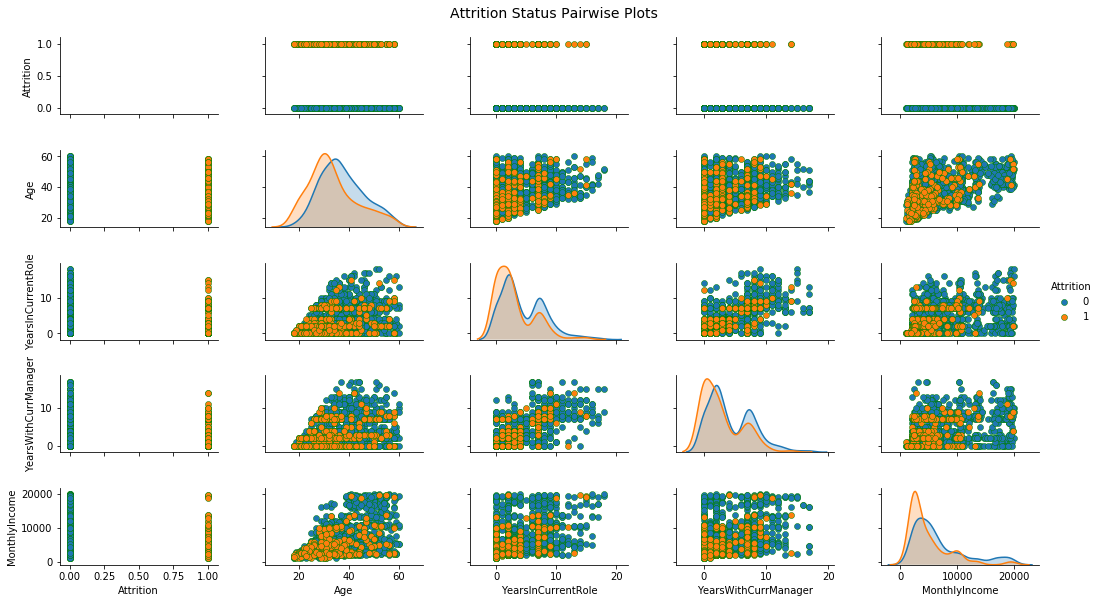

In [31]:
import seaborn as sns
cols = ['Attrition','Age', 'YearsInCurrentRole', 'YearsWithCurrManager','MonthlyIncome']
pp = sns.pairplot(df_hr_new[cols], hue='Attrition', size=1.7, aspect=1.7, 
                  plot_kws=dict(edgecolor="green", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attrition Status Pairwise Plots', fontsize=14)

# Building the Decision Tree Model for the Attrition Data

In [32]:
# Creating Training and Test data
x_train,x_test,y_train,y_test = train_test_split(df_hr_new.drop(['Attrition'],axis=1),
                                                 df_hr_new['Attrition'],train_size = 0.6,random_state=1)

/Users/ssg/Desktop/Python/packge/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


We are not using any kind of scaling for the data as that is not a mandatory requirement for DT algorithm

In [33]:
print(x_train.shape)
print(x_test.shape)

(882, 51)
(588, 51)


In [34]:
# We are first building a model with default parameters for DecisionTreeClassifier()
clf_dt = DecisionTreeClassifier(random_state=1)
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [35]:
# Declaring a Function to Detect Model’s Accuracy 
def model_perf(model_name, x_train, y_train, y_test, y_pred):
    print ('Model name: %s'%model_name)
    print ('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, y_pred))
    print ('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    print ('Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr))
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.758503
Test accuracy (ROC AUC Score): 0.598281
Area Under the Precision-Recall Curve: 0.219838


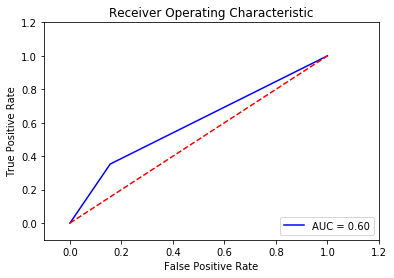

In [36]:
# Finding Accuracy of Decision Tree Classifier
y_pred = clf_dt.predict(x_test)
model_perf('Decision tree classifier', x_train, y_train, y_test,y_pred)

# Hyper-parameter tuning

In [37]:
# Grid Search for dealing with Overfitting Problem
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = Pipeline([
        ('clf_dt', DecisionTreeClassifier(criterion='gini'))
    ])
parameters = {
    'clf_dt__max_depth' :(5,10,20,50,100),
    'clf_dt__min_samples_split':(2,3,4),
    'clf_dt__min_samples_leaf': (1,2,3),
    'clf_dt__max_features': ['auto', None, 'log2','sqrt']
}

In [38]:
grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1,cv=5,verbose=1,scoring='accuracy')
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    6.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf_dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf_dt__max_depth': (5, 10, 20, 50, 100), 'clf_dt__min_samples_split': (2, 3, 4), 'clf_dt__min_samples_leaf': (1, 2, 3), 'clf_dt__max_features': ['auto', None, 'log2', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [39]:
print(grid_search.best_params_)

{'clf_dt__max_depth': 5, 'clf_dt__max_features': 'sqrt', 'clf_dt__min_samples_leaf': 2, 'clf_dt__min_samples_split': 4}


In [40]:
# Training the Model by Applying Decision Tree Classifier
clf_dt_best = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,
                                     min_samples_leaf=1,random_state=1)
clf_dt_best.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.806122
Test accuracy (ROC AUC Score): 0.572864
Area Under the Precision-Recall Curve: 0.198830


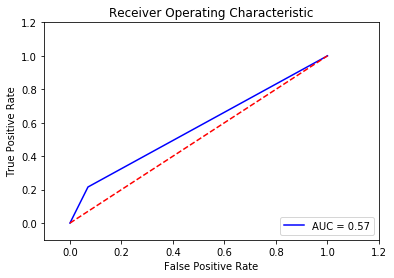

In [41]:
# Finding Accuracy of Decision Tree Classifier
y_pred = clf_dt_best.predict(x_test)
model_perf('Decision tree classifier', x_train, y_train, y_test,y_pred)

# Model Performance measures

In [43]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

def get_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels),2))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels,average='weighted'),2))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels,average='weighted'),2))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels,average='weighted'),2))

def train_predict_model(classifier,train_features,train_labels,test_features,test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions

def confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, labels=classes)
    mat_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                           labels=level_labels), index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels)) 
    print(mat_frame)

def classification_report(true_labels, predicted_labels, classes=[1,0]):
    report = metrics.classification_report(y_true=true_labels,y_pred=predicted_labels, labels=classes) 
    print(report)

def model_performance_metrics(true_labels,predicted_labels,classes=[1,0]):
    print('Model Performance metrics:')
    print('*'*70)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('Model Classification report:')
    print('*'*70)
    classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    print('Prediction Confusion Matrix:')
    print('*'*70)
    confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels,classes=classes)

In [44]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.81
Precision: 0.77
Recall: 0.81
F1 Score: 0.78
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.39      0.22      0.28       102
           0       0.85      0.93      0.89       486

   micro avg       0.81      0.81      0.81       588
   macro avg       0.62      0.57      0.58       588
weighted avg       0.77      0.81      0.78       588

Prediction Confusion Matrix:
**********************************************************************
          Predicted:     
                   1    0
Actual: 1         22   80
        0         34  452


# Generating Decile Report

In [45]:
# Decile Report
def Decile_report(model, X_train, X_test, Y_train,Y_test):
    y_train = model.predict_proba(X_train)
    tab = np.array((y_train[:,1], Y_train)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    l1 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l1.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    train_decile = pd.DataFrame(l1,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    y_test = model.predict_proba(X_test)
    tab = np.array((y_test[:,1], Y_test)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    
    l2 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l2.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    test_decile = pd.DataFrame(l2,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    return train_decile,test_decile

In [46]:
train_decile, test_decile = Decile_report(clf_dt_best, x_train, x_test, y_train, y_test)

In [47]:
test_decile

,Decile,N,pred_mean,actual_mean,responders,cum_responders,cum_precision,cum_recall,lift
0,0,59,0.902,0.424,25.0,25.0,0.424,0.245,2.443
1,1,59,0.274,0.305,18.0,43.0,0.364,0.422,2.101
2,2,59,0.106,0.153,9.0,52.0,0.294,0.510,1.694
3,3,59,0.074,0.186,11.0,63.0,0.267,0.618,1.539
4,4,59,0.055,0.085,5.0,68.0,0.231,0.667,1.329
5,5,59,0.044,0.119,7.0,75.0,0.212,0.735,1.221
6,6,59,0.044,0.051,3.0,78.0,0.189,0.765,1.089
7,7,59,0.044,0.085,5.0,83.0,0.176,0.814,1.014
8,8,58,0.044,0.121,7.0,90.0,0.170,0.882,0.979
9,9,58,0.018,0.207,12.0,102.0,0.173,1.000,1.000


# Dealing with Class Imbalance

Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.795918
Test accuracy (ROC AUC Score): 0.586057
Area Under the Precision-Recall Curve: 0.210159


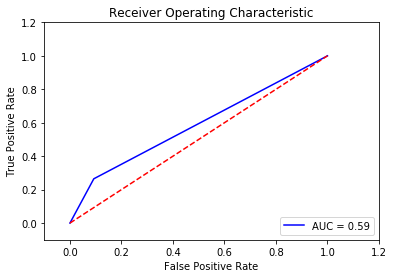

In [48]:
# Training the Model by Applying Decision Tree Classifier
# Trying out various options for class weights
clf_dt_best_wgt_1 = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,
                                     min_samples_leaf=1,class_weight={0: 0.4, 1: 0.6},
                                     random_state=1)
clf_dt_best_wgt_1.fit(x_train, y_train)

# Finding Accuracy of Decision Tree Classifier
y_pred_wght_1 = clf_dt_best_wgt_1.predict(x_test)
model_perf('Decision tree classifier', x_train, y_train, y_test,y_pred_wght_1)

Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.806122
Test accuracy (ROC AUC Score): 0.572864
Area Under the Precision-Recall Curve: 0.198830


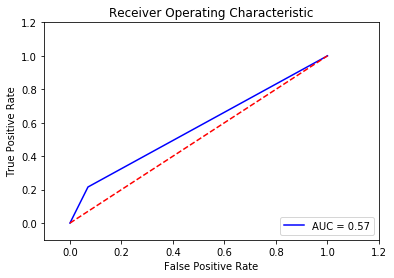

In [49]:
# Check for other ratio as class weights
clf_dt_best_wgt_2 = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,
                                     min_samples_leaf=1,class_weight={0: 0.5, 1: 0.5},
                                     random_state=1)
clf_dt_best_wgt_2.fit(x_train, y_train)

# Finding Accuracy of Decision Tree Classifier
y_pred_wght_2 = clf_dt_best_wgt_2.predict(x_test)
model_perf('Decision tree classifier', x_train, y_train, y_test,y_pred_wght_2)

# Getting the feature importance from the DT model

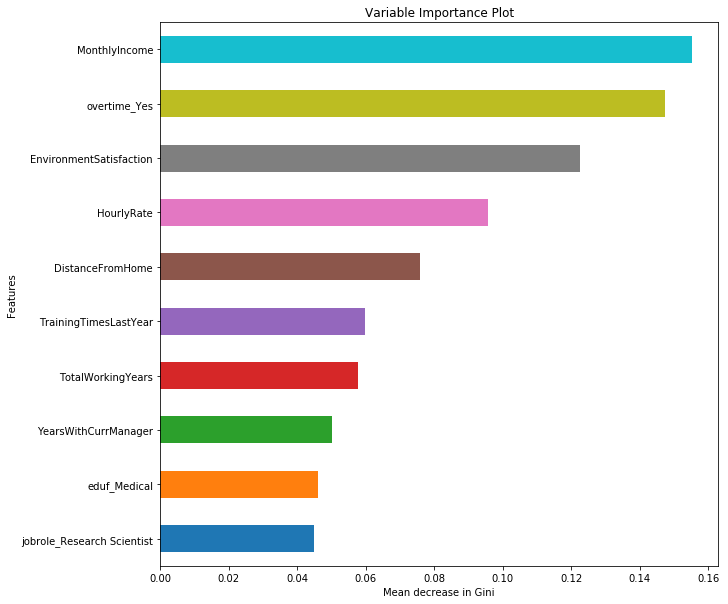

In [50]:
# Plot of Variable importance by mean decrease in gini - Choosing the top 10 features
feature_ranks = pd.Series(clf_dt_best.feature_importances_,index=x_train.columns, name='Importance').sort_values(ascending=False, inplace=False)
feature_ranks.index.name = 'Features'
top_features = feature_ranks.iloc[:10].sort_values(ascending=True,inplace=False)
plt.figure(figsize=(10,10))
ax = top_features.plot(kind='barh')
_ = ax.set_title("Variable Importance Plot")
_ = ax.set_xlabel('Mean decrease in Gini')
_ = ax.set_yticklabels(top_features.index, fontsize=10)

In [51]:
print(dict(zip(df_hr_new.columns, clf_dt_best.feature_importances_)))

{'bustrvl_Non-Travel': 0.0, 'bustrvl_Travel_Frequently': 0.0, 'bustrvl_Travel_Rarely': 0.0, 'dep_Human Resources': 0.0, 'dep_Research & Development': 0.0, 'dep_Sales': 0.0, 'eduf_Human Resources': 0.0, 'eduf_Life Sciences': 0.0, 'eduf_Marketing': 0.03840341710213774, 'eduf_Medical': 0.046118901870731685, 'eduf_Other': 0.0, 'eduf_Technical Degree': 0.0, 'gend_Female': 0.0, 'gend_Male': 0.0, 'jobrole_Healthcare Representative': 0.0, 'jobrole_Human Resources': 0.0, 'jobrole_Laboratory Technician': 0.0, 'jobrole_Manager': 0.0, 'jobrole_Manufacturing Director': 0.0, 'jobrole_Research Director': 0.0, 'jobrole_Research Scientist': 0.04505344063354037, 'jobrole_Sales Executive': 0.0, 'jobrole_Sales Representative': 0.0, 'maritalstat_Divorced': 0.0, 'maritalstat_Married': 0.0, 'maritalstat_Single': 0.0, 'overtime_No': 0.0, 'overtime_Yes': 0.14732039064574393, 'Age': 0.02641834886773476, 'DailyRate': 0.019562678169826726, 'DistanceFromHome': 0.07575568661326215, 'Education': 0.0, 'EnvironmentSat

# Visualizing the Decision Tree

In [52]:
# !pip install pydotplus

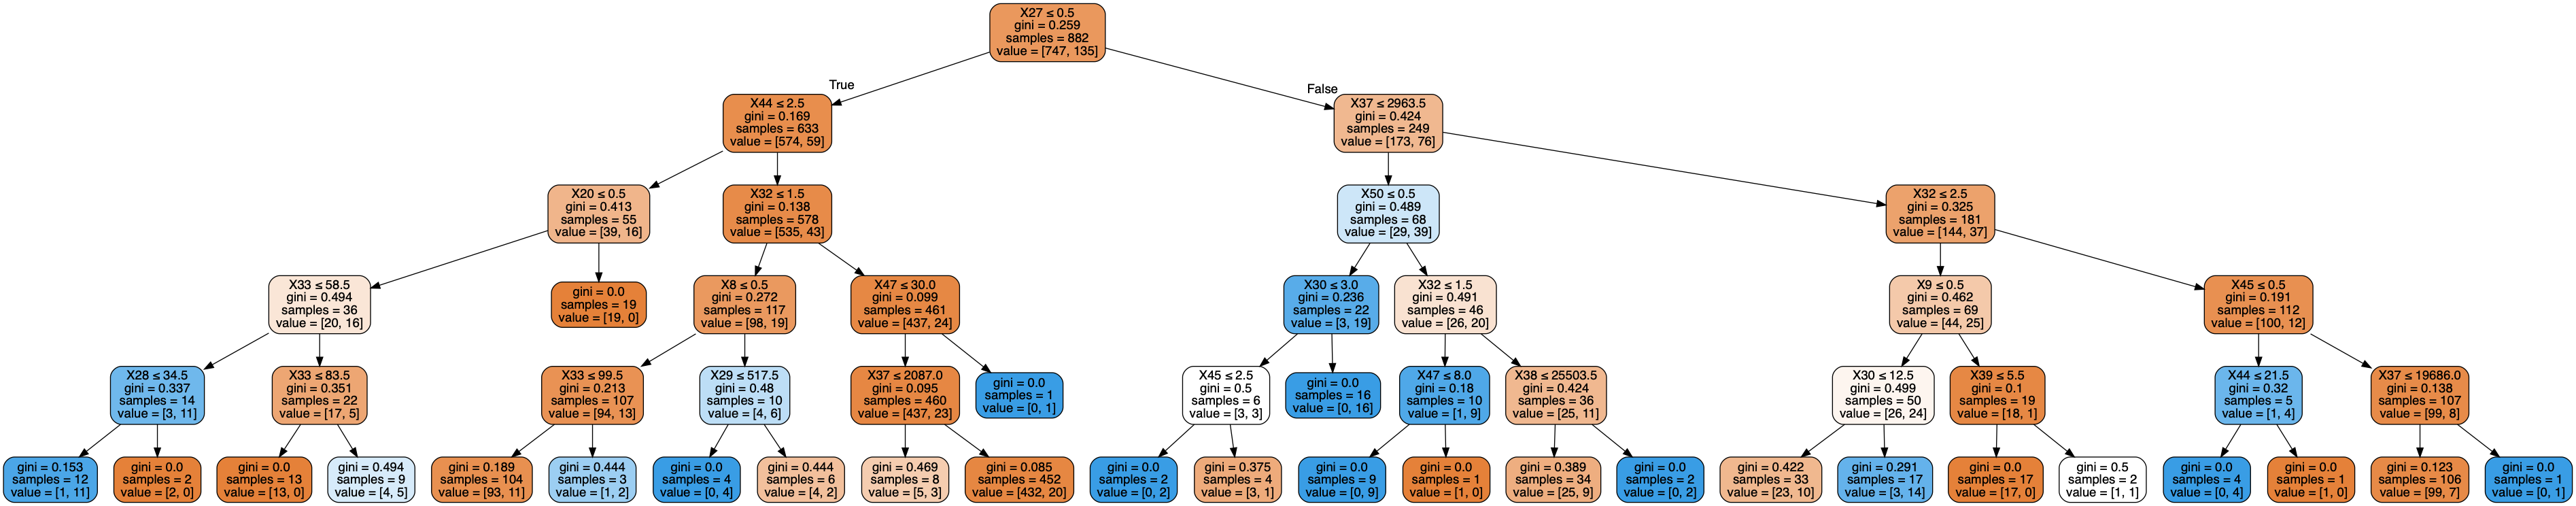

In [53]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_dt_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [55]:
# !pip install graphviz

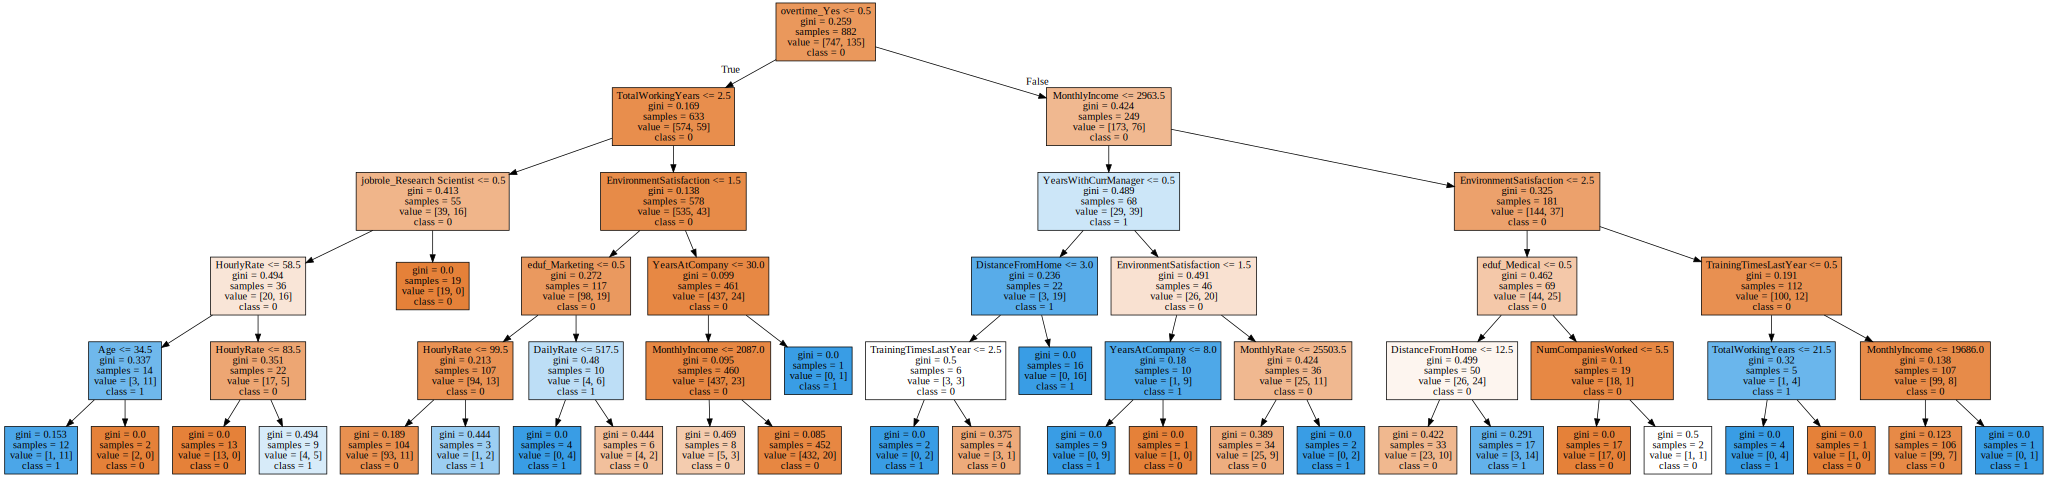

In [54]:
# An alternative way to visualize the tree
clf_feature_names = list(x_train.columns)
from graphviz import Source
from sklearn import tree
from IPython.display import Image
from IPython.display import SVG
graph = Source(tree.export_graphviz(clf_dt_best, out_file=None,feature_names=clf_feature_names, 
                                    class_names=['0', '1',] , filled = True))

display(SVG(graph.pipe(format='svg')))

In [55]:
clf_feature_names = list(x_train.columns)
import graphviz 
dot_data = tree.export_graphviz(clf_dt_best, out_file=None, 
                     feature_names=clf_feature_names,  
                     class_names=['1','0'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Attrition_data_new") 

'Attrition_data_new.pdf'